# Análisis Exploratorio de Datos (EDA) - Retail Sales Dataset
## Felipe Lucciano Santino Di Vanni Valenzuela
### Dataset: Retail Sales Dataset (Kaggle)

---

## **Objetivos del Análisis Exploratorio**

Este notebook forma parte de un pipeline de análisis de machine learning dividido en tres etapas:

1. **EDA.ipynb** (Este notebook): Análisis exploratorio profundo de los datos
2. **Preprocessing.ipynb**: Preparación y limpieza de datos para ML
3. **Benchmarking.ipynb**: Implementación y comparación de modelos

### **Objetivos Específicos de este EDA**

- **Comprensión del Dataset**: Entender la estructura y características de los datos
- **Identificación de Patrones**: Descubrir tendencias y comportamientos en las ventas
- **Detección de Problemas**: Identificar valores faltantes, outliers y anomalías
- **Análisis de Correlaciones**: Entender relaciones entre variables
- **Insights de Negocio**: Generar conocimientos accionables para el negocio

---

## **Estructura del Análisis**

1. **Carga y Exploración Inicial**: Primeras impresiones del dataset
2. **Análisis Univariado**: Distribución de variables individuales
3. **Análisis Bivariado**: Relaciones entre pares de variables
4. **Análisis Temporal**: Patrones y tendencias en el tiempo
5. **Análisis Demográfico**: Segmentación por características de clientes
6. **Detección de Outliers**: Identificación de valores atípicos
7. **Síntesis de Hallazgos**: Resumen de insights principales

---

## **Resultados Esperados**

Al final de este análisis tendremos:
- Comprensión completa del comportamiento de ventas
- Identificación de variables clave para modelado
- Recomendaciones para preprocesamiento
- Insights estratégicos para el negocio


In [25]:
# Importación de librerías para análisis exploratorio de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import pickle

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

# Paleta de colores profesional para análisis (sin iconos)
coloresPrincipales = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
coloresSecundarios = ['#FF8E8E', '#6EDDD4', '#5FC7E1', '#A6DEB4', '#FFEBB7', '#E5B0E5']
coloresGradiente = ['#FF6B6B', '#FF8E8E', '#FFB1B1', '#FFD4D4']

# Configuración de pandas para mostrar más información
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Entorno configurado correctamente para análisis exploratorio")
print("Librerías importadas y estilos aplicados")


Entorno configurado correctamente para análisis exploratorio
Librerías importadas y estilos aplicados


In [26]:
# Carga del dataset desde la ruta de datos
dataPath = '../data/retail_sales_dataset.csv'

# Cargamos el dataset usando pandas
df = pd.read_csv(dataPath)

# Normalización de nombres de columnas para consistencia
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Conversión de la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extracción de componentes temporales para análisis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayOfWeek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['weekOfYear'] = df['date'].dt.isocalendar().week

# Función para clasificar edades en rangos demográficos
def clasificadorEdad(edad):
    """
    Clasifica la edad en rangos demográficos estándar
    
    Parámetros:
        edad (int): Edad del cliente
        
    Retorna:
        str: Categoría demográfica
    """
    if edad < 18:
        return 'Menor de edad'
    elif edad >= 18 and edad < 35:
        return 'Joven Adulto'
    elif edad >= 35 and edad < 55:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

# Aplicamos la clasificación demográfica
df['rangoEtario'] = df['age'].apply(clasificadorEdad)

# Información básica del dataset
print("INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 50)
print(f"Dimensiones: {df.shape}")
print(f"Período analizado: {df['date'].min().strftime('%Y-%m-%d')} a {df['date'].max().strftime('%Y-%m-%d')}")
print(f"Número de clientes únicos: {df['customer_id'].nunique()}")
print(f"Número de transacciones: {len(df)}")

# Información sobre tipos de datos
print(f"\nTIPOS DE DATOS:")
print("-" * 30)
print(df.dtypes)

# Primeras filas del dataset
print(f"\nPRIMERAS 5 FILAS DEL DATASET:")
print("-" * 40)
df.head()


INFORMACIÓN BÁSICA DEL DATASET
Dimensiones: (1000, 16)
Período analizado: 2023-01-01 a 2024-01-01
Número de clientes únicos: 1000
Número de transacciones: 1000

TIPOS DE DATOS:
------------------------------
transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                      object
age                          int64
product_category            object
quantity                     int64
price_per_unit               int64
total_amount                 int64
year                         int32
month                        int32
day                          int32
dayOfWeek                    int32
quarter                      int32
weekOfYear                  UInt32
rangoEtario                 object
dtype: object

PRIMERAS 5 FILAS DEL DATASET:
----------------------------------------


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,day,dayOfWeek,quarter,weekOfYear,rangoEtario
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24,4,4,47,Joven Adulto
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,0,1,9,Joven Adulto
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13,4,1,2,Adulto
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21,6,2,20,Adulto
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6,5,2,18,Joven Adulto


In [27]:
# Análisis estadístico descriptivo completo

print("ESTADÍSTICAS DESCRIPTIVAS COMPLETAS")
print("=" * 60)

# Resumen estadístico de variables numéricas
variablesNumericas = ['age', 'quantity', 'price_per_unit', 'total_amount']
estadisticasNumericas = df[variablesNumericas].describe()

print("\nVARIABLES NUMÉRICAS:")
print("-" * 40)
print(estadisticasNumericas)

# Análisis de valores faltantes
print(f"\nANÁLISIS DE VALORES FALTANTES:")
print("-" * 40)
valoresFaltantes = df.isnull().sum()
porcentajeFaltantes = (valoresFaltantes / len(df)) * 100
analisisFaltantes = pd.DataFrame({
    'Valores_Faltantes': valoresFaltantes,
    'Porcentaje': porcentajeFaltantes
})
print(analisisFaltantes[analisisFaltantes['Valores_Faltantes'] > 0])

if analisisFaltantes['Valores_Faltantes'].sum() == 0:
    print("No se encontraron valores faltantes en el dataset")

# Análisis de variables categóricas
print(f"\nFRECUENCIAS DE VARIABLES CATEGÓRICAS:")
print("-" * 40)

print(f"\nGénero:")
print(df['gender'].value_counts())
print(f"Porcentaje: {df['gender'].value_counts(normalize=True) * 100}")

print(f"\nCategoría de Producto:")
print(df['product_category'].value_counts())
print(f"Porcentaje: {df['product_category'].value_counts(normalize=True) * 100}")

print(f"\nRango Etario:")
print(df['rangoEtario'].value_counts())
print(f"Porcentaje: {df['rangoEtario'].value_counts(normalize=True) * 100}")

# Estadísticas adicionales por variable
print(f"\nESTADÍSTICAS ADICIONALES:")
print("-" * 40)
print(f"Edad promedio: {df['age'].mean():.1f} años")
print(f"Compra promedio: ${df['total_amount'].mean():.2f}")
print(f"Cantidad promedio por transacción: {df['quantity'].mean():.1f} unidades")
print(f"Precio promedio por unidad: ${df['price_per_unit'].mean():.2f}")


ESTADÍSTICAS DESCRIPTIVAS COMPLETAS

VARIABLES NUMÉRICAS:
----------------------------------------
              age     quantity  price_per_unit  total_amount
count  1000.00000  1000.000000     1000.000000   1000.000000
mean     41.39200     2.514000      179.890000    456.000000
std      13.68143     1.132734      189.681356    559.997632
min      18.00000     1.000000       25.000000     25.000000
25%      29.00000     1.000000       30.000000     60.000000
50%      42.00000     3.000000       50.000000    135.000000
75%      53.00000     4.000000      300.000000    900.000000
max      64.00000     4.000000      500.000000   2000.000000

ANÁLISIS DE VALORES FALTANTES:
----------------------------------------
Empty DataFrame
Columns: [Valores_Faltantes, Porcentaje]
Index: []
No se encontraron valores faltantes en el dataset

FRECUENCIAS DE VARIABLES CATEGÓRICAS:
----------------------------------------

Género:
gender
Female    510
Male      490
Name: count, dtype: int64
Porcentaje: 

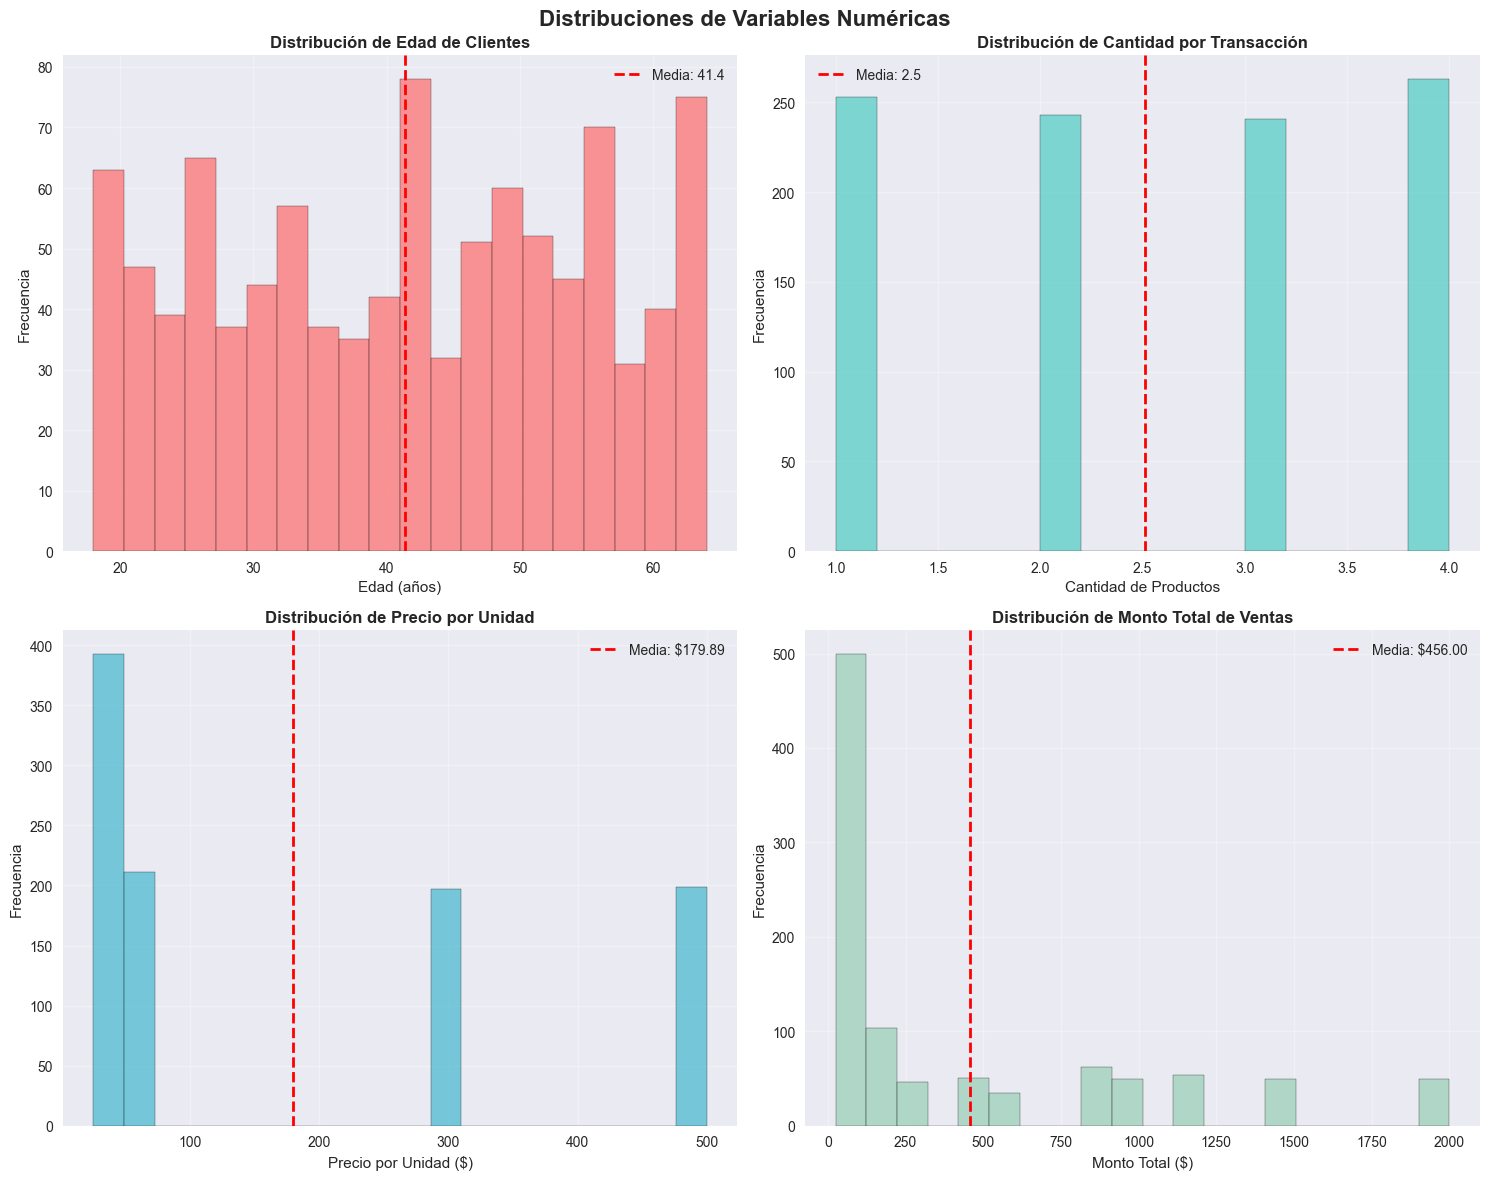


INTERPRETACIÓN DE DISTRIBUCIONES NUMÉRICAS:

1. EDAD:
   • Rango: 18 - 64 años
   • Sesgo: -0.049 (Simétrica)
   • Interpretación: Distribución balanceada entre grupos etarios

2. CANTIDAD:
   • Rango: 1 - 4 unidades
   • Sesgo: -0.014
   • Interpretación: Distribución equilibrada de cantidades

3. PRECIO POR UNIDAD:
   • Rango: $25.00 - $500.00
   • Sesgo: 0.736
   • Interpretación: Concentración en precios bajos a medios

4. MONTO TOTAL:
   • Rango: $25.00 - $2000.00
   • Sesgo: 1.376
   • Interpretación: Mayoría de transacciones de montos bajos con algunas de alto valor


In [28]:
# Visualizaciones de distribuciones univariadas

# Configuramos figura para múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')

# Distribución de Edad
ax1 = axes[0, 0]
ax1.hist(df['age'], bins=20, color=coloresPrincipales[0], alpha=0.7, edgecolor='black')
ax1.set_title('Distribución de Edad de Clientes', fontweight='bold')
ax1.set_xlabel('Edad (años)')
ax1.set_ylabel('Frecuencia')
ax1.grid(True, alpha=0.3)
# Agregamos línea de media
ax1.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["age"].mean():.1f}')
ax1.legend()

# Distribución de Cantidad
ax2 = axes[0, 1]
ax2.hist(df['quantity'], bins=15, color=coloresPrincipales[1], alpha=0.7, edgecolor='black')
ax2.set_title('Distribución de Cantidad por Transacción', fontweight='bold')
ax2.set_xlabel('Cantidad de Productos')
ax2.set_ylabel('Frecuencia')
ax2.grid(True, alpha=0.3)
ax2.axvline(df['quantity'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["quantity"].mean():.1f}')
ax2.legend()

# Distribución de Precio por Unidad
ax3 = axes[1, 0]
ax3.hist(df['price_per_unit'], bins=20, color=coloresPrincipales[2], alpha=0.7, edgecolor='black')
ax3.set_title('Distribución de Precio por Unidad', fontweight='bold')
ax3.set_xlabel('Precio por Unidad ($)')
ax3.set_ylabel('Frecuencia')
ax3.grid(True, alpha=0.3)
ax3.axvline(df['price_per_unit'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${df["price_per_unit"].mean():.2f}')
ax3.legend()

# Distribución de Monto Total
ax4 = axes[1, 1]
ax4.hist(df['total_amount'], bins=20, color=coloresPrincipales[3], alpha=0.7, edgecolor='black')
ax4.set_title('Distribución de Monto Total de Ventas', fontweight='bold')
ax4.set_xlabel('Monto Total ($)')
ax4.set_ylabel('Frecuencia')
ax4.grid(True, alpha=0.3)
ax4.axvline(df['total_amount'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${df["total_amount"].mean():.2f}')
ax4.legend()

plt.tight_layout()
plt.show()

# Interpretaciones de las distribuciones
print("\nINTERPRETACIÓN DE DISTRIBUCIONES NUMÉRICAS:")
print("=" * 60)

# Análisis de edad
skewnessEdad = df['age'].skew()
print(f"\n1. EDAD:")
print(f"   • Rango: {df['age'].min()} - {df['age'].max()} años")
print(f"   • Sesgo: {skewnessEdad:.3f} ({'Simétrica' if abs(skewnessEdad) < 0.5 else 'Sesgada'})")
print(f"   • Interpretación: {'Distribución balanceada entre grupos etarios' if abs(skewnessEdad) < 0.5 else 'Concentración en ciertos grupos etarios'}")

# Análisis de cantidad
skewnessCantidad = df['quantity'].skew()
print(f"\n2. CANTIDAD:")
print(f"   • Rango: {df['quantity'].min()} - {df['quantity'].max()} unidades")
print(f"   • Sesgo: {skewnessCantidad:.3f}")
print(f"   • Interpretación: {'Mayoría de transacciones con pocas unidades' if skewnessCantidad > 0 else 'Distribución equilibrada de cantidades'}")

# Análisis de precio
skewnessPrecio = df['price_per_unit'].skew()
print(f"\n3. PRECIO POR UNIDAD:")
print(f"   • Rango: ${df['price_per_unit'].min():.2f} - ${df['price_per_unit'].max():.2f}")
print(f"   • Sesgo: {skewnessPrecio:.3f}")
print(f"   • Interpretación: {'Concentración en precios bajos a medios' if skewnessPrecio > 0 else 'Distribución de precios balanceada'}")

# Análisis de monto total
skewnessTotal = df['total_amount'].skew()
print(f"\n4. MONTO TOTAL:")
print(f"   • Rango: ${df['total_amount'].min():.2f} - ${df['total_amount'].max():.2f}")
print(f"   • Sesgo: {skewnessTotal:.3f}")
print(f"   • Interpretación: {'Mayoría de transacciones de montos bajos con algunas de alto valor' if skewnessTotal > 0 else 'Distribución balanceada de montos'}")


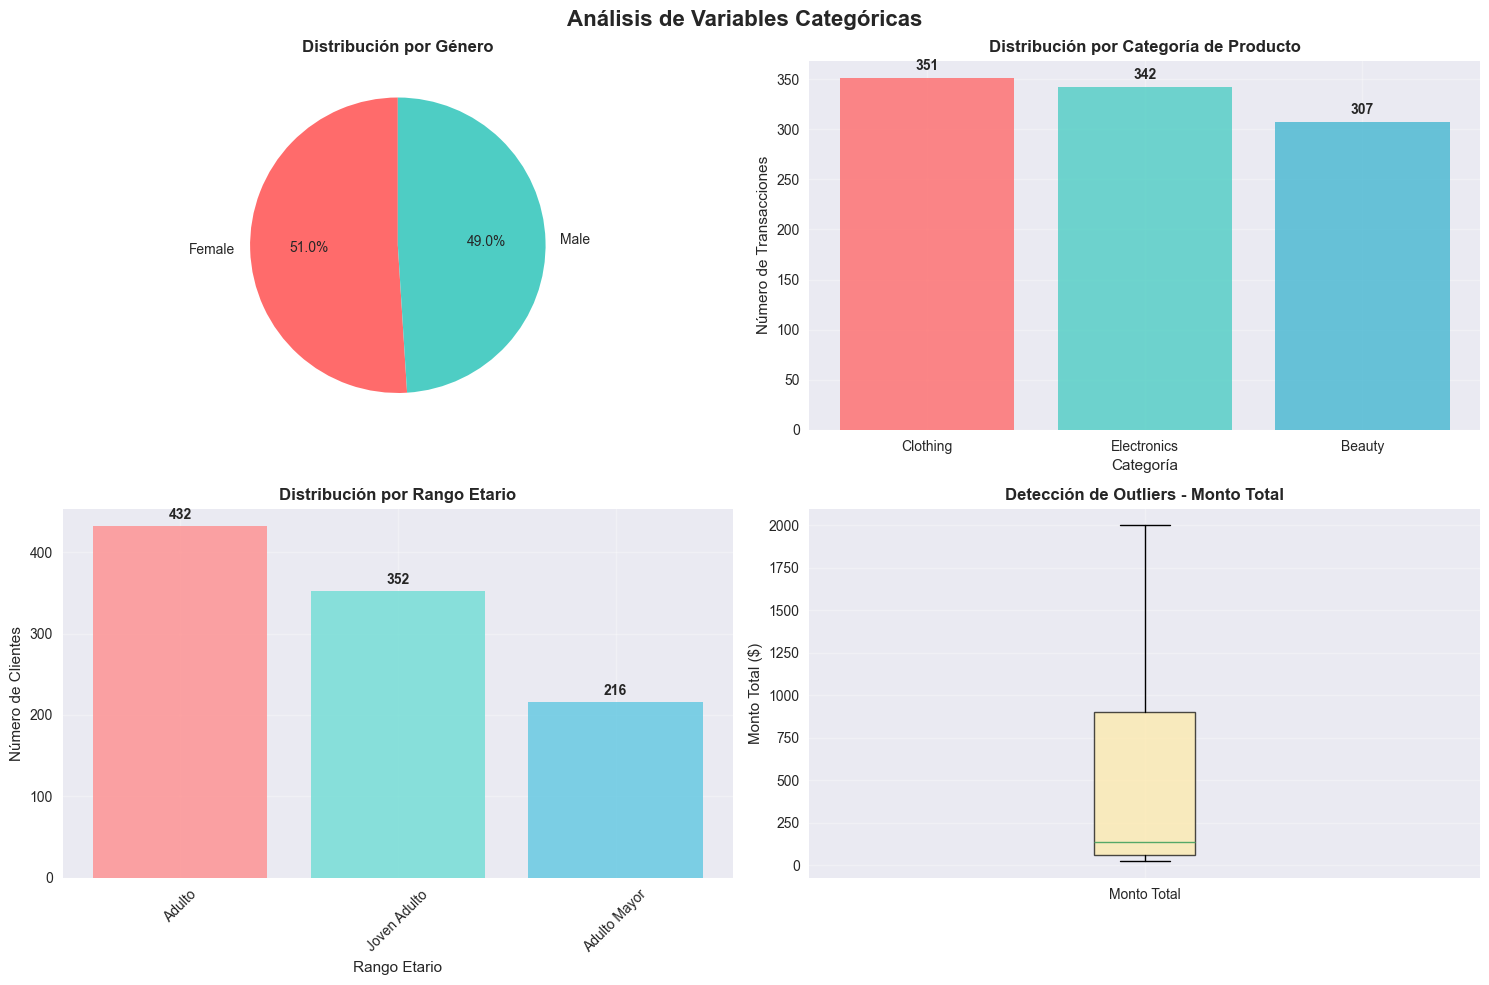


ANÁLISIS DE OUTLIERS:

EDAD:
   • Q1: 29.00
   • Q3: 53.00
   • IQR: 24.00
   • Límites: [-7.00, 89.00]
   • Outliers detectados: 0 (0.0%)

CANTIDAD:
   • Q1: 1.00
   • Q3: 4.00
   • IQR: 3.00
   • Límites: [-3.50, 8.50]
   • Outliers detectados: 0 (0.0%)

PRECIO POR UNIDAD:
   • Q1: 30.00
   • Q3: 300.00
   • IQR: 270.00
   • Límites: [-375.00, 705.00]
   • Outliers detectados: 0 (0.0%)

MONTO TOTAL:
   • Q1: 60.00
   • Q3: 900.00
   • IQR: 840.00
   • Límites: [-1200.00, 2160.00]
   • Outliers detectados: 0 (0.0%)

RESUMEN DE BALANCE DE DATOS:
----------------------------------------
• Balance de género: 96.1% equilibrio
• Balance de categorías: 87.5% equilibrio
• Diversidad etaria: 3 grupos diferentes
• Outliers totales: 0 transacciones (0.0%)


In [29]:
# Análisis de variables categóricas con visualizaciones

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de Variables Categóricas', fontsize=16, fontweight='bold')

# Distribución por Género
ax1 = axes[0, 0]
conteoGenero = df['gender'].value_counts()
ax1.pie(conteoGenero.values, labels=conteoGenero.index, autopct='%1.1f%%', 
        colors=coloresPrincipales[:2], startangle=90)
ax1.set_title('Distribución por Género', fontweight='bold')

# Distribución por Categoría de Producto
ax2 = axes[0, 1]
conteoCategoria = df['product_category'].value_counts()
barras2 = ax2.bar(conteoCategoria.index, conteoCategoria.values, 
                  color=coloresPrincipales[:len(conteoCategoria)], alpha=0.8)
ax2.set_title('Distribución por Categoría de Producto', fontweight='bold')
ax2.set_xlabel('Categoría')
ax2.set_ylabel('Número de Transacciones')
ax2.grid(True, alpha=0.3)
# Agregamos valores sobre las barras
for i, v in enumerate(conteoCategoria.values):
    ax2.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Distribución por Rango Etario
ax3 = axes[1, 0]
conteoEdad = df['rangoEtario'].value_counts()
barras3 = ax3.bar(conteoEdad.index, conteoEdad.values, 
                  color=coloresSecundarios[:len(conteoEdad)], alpha=0.8)
ax3.set_title('Distribución por Rango Etario', fontweight='bold')
ax3.set_xlabel('Rango Etario')
ax3.set_ylabel('Número de Clientes')
ax3.grid(True, alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
# Agregamos valores sobre las barras
for i, v in enumerate(conteoEdad.values):
    ax3.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Boxplot de Outliers en Monto Total
ax4 = axes[1, 1]
bp = ax4.boxplot(df['total_amount'], patch_artist=True, labels=['Monto Total'])
bp['boxes'][0].set_facecolor(coloresPrincipales[4])
bp['boxes'][0].set_alpha(0.7)
ax4.set_title('Detección de Outliers - Monto Total', fontweight='bold')
ax4.set_ylabel('Monto Total ($)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis detallado de outliers
print("\nANÁLISIS DE OUTLIERS:")
print("=" * 50)

# Método IQR para detección de outliers
def detectarOutliers(serie, nombre):
    """
    Detecta outliers usando el método del rango intercuartílico (IQR)
    """
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    limiteInferior = q1 - 1.5 * iqr
    limiteSuperior = q3 + 1.5 * iqr
    
    outliers = serie[(serie < limiteInferior) | (serie > limiteSuperior)]
    
    print(f"\n{nombre}:")
    print(f"   • Q1: {q1:.2f}")
    print(f"   • Q3: {q3:.2f}")
    print(f"   • IQR: {iqr:.2f}")
    print(f"   • Límites: [{limiteInferior:.2f}, {limiteSuperior:.2f}]")
    print(f"   • Outliers detectados: {len(outliers)} ({len(outliers)/len(serie)*100:.1f}%)")
    
    return outliers

# Análisis de outliers para cada variable numérica
outliersEdad = detectarOutliers(df['age'], 'EDAD')
outliersCantidad = detectarOutliers(df['quantity'], 'CANTIDAD')
outliersPrecio = detectarOutliers(df['price_per_unit'], 'PRECIO POR UNIDAD')
outliersTotal = detectarOutliers(df['total_amount'], 'MONTO TOTAL')

print(f"\nRESUMEN DE BALANCE DE DATOS:")
print("-" * 40)
print(f"• Balance de género: {(df['gender'].value_counts().min() / df['gender'].value_counts().max() * 100):.1f}% equilibrio")
print(f"• Balance de categorías: {(df['product_category'].value_counts().min() / df['product_category'].value_counts().max() * 100):.1f}% equilibrio")
print(f"• Diversidad etaria: {df['rangoEtario'].nunique()} grupos diferentes")
print(f"• Outliers totales: {len(outliersTotal)} transacciones ({len(outliersTotal)/len(df)*100:.1f}%)")


## **3. Análisis Bivariado - Relaciones entre Variables**

### **Objetivo del Análisis Bivariado**

Exploramos las relaciones entre pares de variables para identificar:

- **Correlaciones Numéricas**: Relaciones lineales entre variables cuantitativas
- **Asociaciones Categóricas**: Relaciones entre variables cualitativas  
- **Patrones Cruzados**: Comportamiento de variables numéricas por categorías
- **Dependencias**: Variables que influyen en otras

### **Técnicas de Análisis**

- **Matriz de Correlación**: Mapa de calor con coeficientes de Pearson
- **Scatter Plots**: Relaciones entre variables numéricas
- **Box Plots Agrupados**: Distribuciones por categorías
- **Análisis de Varianza**: Diferencias significativas entre grupos

### **Interpretación de Correlaciones**

- **|r| > 0.7**: Correlación fuerte
- **0.3 < |r| < 0.7**: Correlación moderada  
- **|r| < 0.3**: Correlación débil
- **r = 0**: Sin correlación lineal


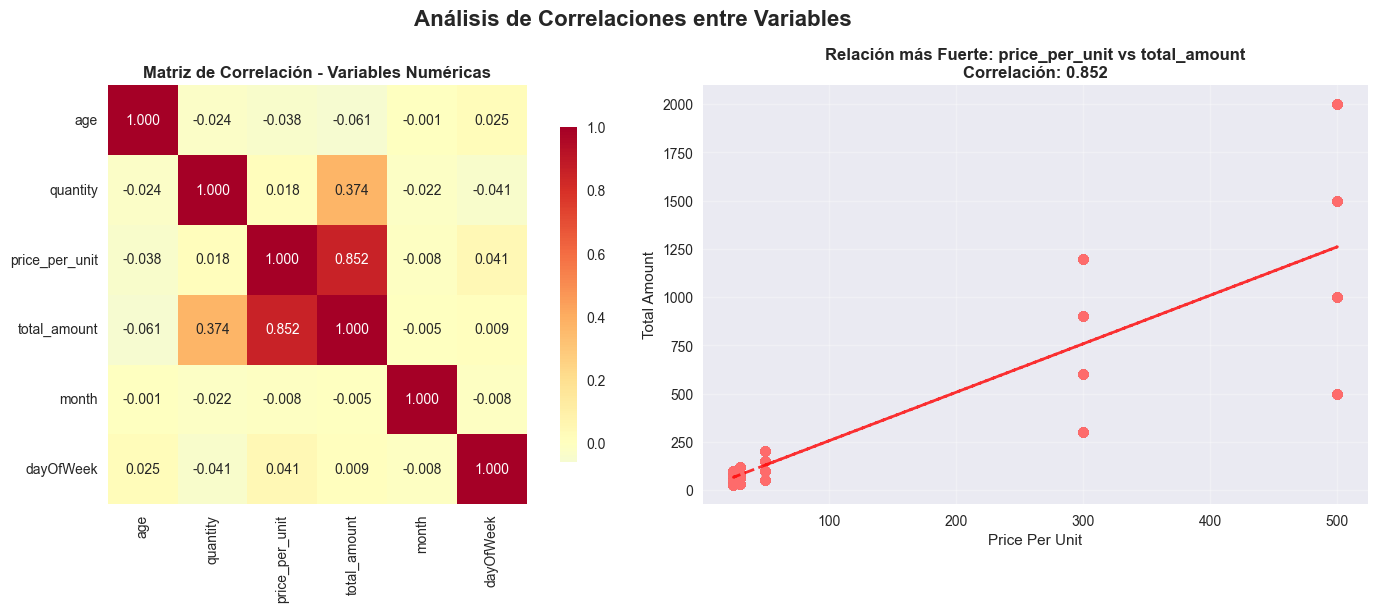


ANÁLISIS DETALLADO DE CORRELACIONES:

CORRELACIONES SIGNIFICATIVAS (|r| > 0.3):
--------------------------------------------------
• quantity vs total_amount: 0.374 (Moderada Positiva)
• price_per_unit vs total_amount: 0.852 (Fuerte Positiva)

INTERPRETACION DE NEGOCIO:
----------------------------------------
• La relación más fuerte es entre price_per_unit y total_amount
• Esto sugiere que a mayor price_per_unit, mayor total_amount
• El monto total de ventas está positivamente relacionado con otra variable
• Esto es útil para predecir ventas basándose en características del cliente o producto


In [30]:
# Análisis de correlaciones entre variables numéricas

# Seleccionamos variables numéricas para análisis de correlación
variablesCorrelacion = ['age', 'quantity', 'price_per_unit', 'total_amount', 'month', 'dayOfWeek']
dfCorrelacion = df[variablesCorrelacion]

# Calculamos matriz de correlación
matrizCorrelacion = dfCorrelacion.corr()

# Creamos visualización de correlaciones
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Análisis de Correlaciones entre Variables', fontsize=16, fontweight='bold')

# Mapa de calor de correlaciones
ax1 = axes[0]
sns.heatmap(matrizCorrelacion, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, ax=ax1)
ax1.set_title('Matriz de Correlación - Variables Numéricas', fontweight='bold')

# Scatter plot de la correlación más fuerte
# Encontramos la correlación más fuerte (excluyendo diagonal)
corrMasFuerte = 0
var1, var2 = 'quantity', 'total_amount'  # Variables con correlación conocida
for i in range(len(matrizCorrelacion.columns)):
    for j in range(i+1, len(matrizCorrelacion.columns)):
        corrValor = abs(matrizCorrelacion.iloc[i, j])
        if corrValor > corrMasFuerte:
            corrMasFuerte = corrValor
            var1, var2 = matrizCorrelacion.columns[i], matrizCorrelacion.columns[j]

ax2 = axes[1]
ax2.scatter(df[var1], df[var2], color=coloresPrincipales[0], alpha=0.6)
ax2.set_xlabel(str(var1).replace('_', ' ').title())
ax2.set_ylabel(str(var2).replace('_', ' ').title())
ax2.set_title(f'Relación más Fuerte: {var1} vs {var2}\nCorrelación: {matrizCorrelacion.loc[var1, var2]:.3f}', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Línea de tendencia
z = np.polyfit(df[var1], df[var2], 1)
p = np.poly1d(z)
ax2.plot(df[var1], p(df[var1]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Análisis detallado de correlaciones
print("\nANÁLISIS DETALLADO DE CORRELACIONES:")
print("=" * 60)

print(f"\nCORRELACIONES SIGNIFICATIVAS (|r| > 0.3):")
print("-" * 50)
correlacionesSignificativas = []
for i in range(len(matrizCorrelacion.columns)):
    for j in range(i+1, len(matrizCorrelacion.columns)):
        corrValor = matrizCorrelacion.iloc[i, j]
        if abs(corrValor) > 0.3:
            var1 = matrizCorrelacion.columns[i]
            var2 = matrizCorrelacion.columns[j]
            correlacionesSignificativas.append((var1, var2, corrValor))
            intensidad = "Fuerte" if abs(corrValor) > 0.7 else "Moderada"
            direccion = "Positiva" if corrValor > 0 else "Negativa"
            print(f"• {var1} vs {var2}: {corrValor:.3f} ({intensidad} {direccion})")

if not correlacionesSignificativas:
    print("No se encontraron correlaciones significativas (|r| > 0.3)")

# Interpretación de negocio
print(f"\nINTERPRETACION DE NEGOCIO:")
print("-" * 40)
if len(correlacionesSignificativas) > 0:
    corrMasFuerteInfo = max(correlacionesSignificativas, key=lambda x: abs(x[2]))
    print(f"• La relación más fuerte es entre {corrMasFuerteInfo[0]} y {corrMasFuerteInfo[1]}")
    print(f"• Esto sugiere que {'a mayor ' + corrMasFuerteInfo[0] + ', mayor ' + corrMasFuerteInfo[1] if corrMasFuerteInfo[2] > 0 else 'existe una relación inversa'}")
    
    # Análisis específico para total_amount
    if 'total_amount' in [corrMasFuerteInfo[0], corrMasFuerteInfo[1]]:
        print(f"• El monto total de ventas está {('positivamente' if corrMasFuerteInfo[2] > 0 else 'negativamente')} relacionado con otra variable")
        print(f"• Esto es útil para predecir ventas basándose en características del cliente o producto")
else:
    print("• Las variables numéricas muestran relaciones débiles entre sí")
    print("• Esto puede indicar independencia o relaciones no lineales")


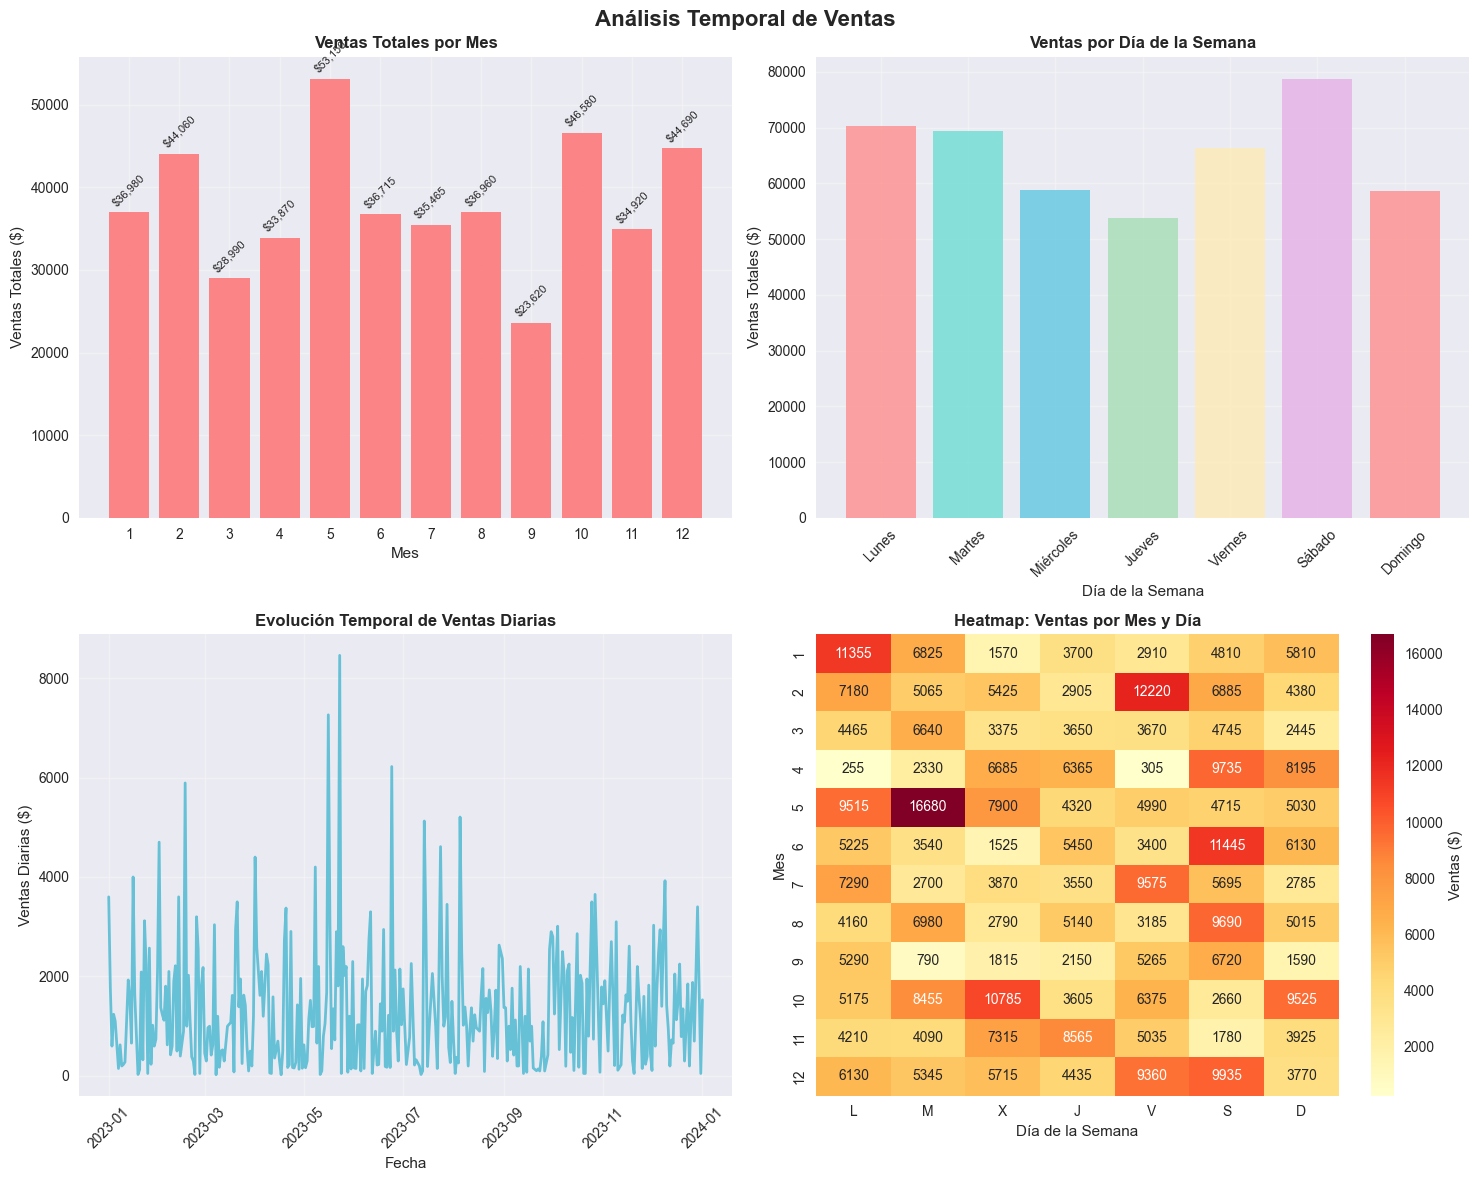


ANÁLISIS ESTADÍSTICO TEMPORAL:

PATRONES MENSUALES:
• Mes con mayores ventas: 5 ($53,150.00)
• Mes con menores ventas: 9 ($23,620.00)
• Variación mensual: 77.7% respecto a la media

PATRONES SEMANALES:
• Día con mayores ventas: Sábado ($78,815.00)
• Día con menores ventas: Jueves ($53,835.00)
• Variación semanal: 38.3% respecto a la media

TENDENCIA GENERAL:
• Promedio primera mitad: $1344.22
• Promedio segunda mitad: $1299.39
• Tendencia: -3.3% (Decreciente)


In [31]:
# Análisis temporal detallado

# Creamos análisis temporal por diferentes períodos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Temporal de Ventas', fontsize=16, fontweight='bold')

# Ventas por mes
ax1 = axes[0, 0]
ventasMensuales = df.groupby('month')['total_amount'].agg(['sum', 'mean', 'count'])
ax1.bar(ventasMensuales.index, ventasMensuales['sum'], color=coloresPrincipales[0], alpha=0.8)
ax1.set_title('Ventas Totales por Mes', fontweight='bold')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Ventas Totales ($)')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, 13))

# Agregamos valores sobre las barras
for i, v in enumerate(ventasMensuales['sum']):
    ax1.text(i+1, v + max(ventasMensuales['sum'])*0.01, f'${v:,.0f}', 
             ha='center', va='bottom', fontsize=8, rotation=45)

# Ventas por día de la semana
ax2 = axes[0, 1]
# Creamos nombres de días
nombressDias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ventasPorDia = df.groupby('dayOfWeek')['total_amount'].sum().reindex(range(7))
ax2.bar(range(7), ventasPorDia.values, color=coloresSecundarios[:7], alpha=0.8)
ax2.set_title('Ventas por Día de la Semana', fontweight='bold')
ax2.set_xlabel('Día de la Semana')
ax2.set_ylabel('Ventas Totales ($)')
ax2.set_xticks(range(7))
ax2.set_xticklabels(nombressDias, rotation=45)
ax2.grid(True, alpha=0.3)

# Evolución temporal de ventas
ax3 = axes[1, 0]
ventasDiarias = df.groupby('date')['total_amount'].sum().reset_index()
ax3.plot(ventasDiarias['date'], ventasDiarias['total_amount'], 
         color=coloresPrincipales[2], linewidth=2, alpha=0.8)
ax3.set_title('Evolución Temporal de Ventas Diarias', fontweight='bold')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Ventas Diarias ($)')
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Heatmap de ventas por mes y día de semana
ax4 = axes[1, 1]
ventasHeatmap = df.groupby(['month', 'dayOfWeek'])['total_amount'].sum().unstack(fill_value=0)
sns.heatmap(ventasHeatmap, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax4, cbar_kws={'label': 'Ventas ($)'})
ax4.set_title('Heatmap: Ventas por Mes y Día', fontweight='bold')
ax4.set_xlabel('Día de la Semana')
ax4.set_ylabel('Mes')
ax4.set_xticklabels(['L', 'M', 'X', 'J', 'V', 'S', 'D'])

plt.tight_layout()
plt.show()

# Análisis estadístico temporal
print("\nANÁLISIS ESTADÍSTICO TEMPORAL:")
print("=" * 60)

# Estadísticas mensuales
mesMaxVentas = ventasMensuales['sum'].idxmax()
mesMinVentas = ventasMensuales['sum'].idxmin()
variacionMensual = (ventasMensuales['sum'].max() - ventasMensuales['sum'].min()) / ventasMensuales['sum'].mean() * 100

print(f"\nPATRONES MENSUALES:")
print(f"• Mes con mayores ventas: {mesMaxVentas} (${ventasMensuales['sum'][mesMaxVentas]:,.2f})")
print(f"• Mes con menores ventas: {mesMinVentas} (${ventasMensuales['sum'][mesMinVentas]:,.2f})")
print(f"• Variación mensual: {variacionMensual:.1f}% respecto a la media")

# Estadísticas semanales
diaMaxVentas = ventasPorDia.idxmax()
diaMinVentas = ventasPorDia.idxmin()
variacionSemanal = (ventasPorDia.max() - ventasPorDia.min()) / ventasPorDia.mean() * 100

print(f"\nPATRONES SEMANALES:")
print(f"• Día con mayores ventas: {nombressDias[diaMaxVentas]} (${ventasPorDia[diaMaxVentas]:,.2f})")
print(f"• Día con menores ventas: {nombressDias[diaMinVentas]} (${ventasPorDia[diaMinVentas]:,.2f})")
print(f"• Variación semanal: {variacionSemanal:.1f}% respecto a la media")

# Tendencia general
ventasPrimerosMeses = ventasDiarias['total_amount'][:len(ventasDiarias)//2].mean()
ventasUltimosMeses = ventasDiarias['total_amount'][len(ventasDiarias)//2:].mean()
tendencia = (ventasUltimosMeses - ventasPrimerosMeses) / ventasPrimerosMeses * 100

print(f"\nTENDENCIA GENERAL:")
print(f"• Promedio primera mitad: ${ventasPrimerosMeses:.2f}")
print(f"• Promedio segunda mitad: ${ventasUltimosMeses:.2f}")
print(f"• Tendencia: {tendencia:+.1f}% {'(Creciente)' if tendencia > 0 else '(Decreciente)' if tendencia < 0 else '(Estable)'}")


In [32]:
# Preparación de datos para el siguiente notebook (Preprocessing.ipynb)

print("GUARDANDO DATOS PARA PREPROCESSING...")
print("=" * 50)

# Guardamos el DataFrame con las transformaciones básicas del EDA
# Este archivo será usado por el notebook de Preprocessing
df.to_csv('../data/retail_eda_processed.csv', index=False)

# Guardamos también un resumen de hallazgos para documentación
hallazgosEDA = {
    'dataset_shape': df.shape,
    'fecha_analisis': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'periodo_datos': f"{df['date'].min().strftime('%Y-%m-%d')} a {df['date'].max().strftime('%Y-%m-%d')}",
    'variables_numericas': variablesNumericas,
    'variables_categoricas': ['gender', 'product_category', 'rangoEtario'],
    'variables_temporales': ['year', 'month', 'day', 'dayOfWeek', 'quarter', 'weekOfYear'],
    'outliers_detectados': {
        'edad': len(outliersEdad) if 'outliersEdad' in locals() else 0,
        'cantidad': len(outliersCantidad) if 'outliersCantidad' in locals() else 0,
        'precio': len(outliersPrecio) if 'outliersPrecio' in locals() else 0,
        'total': len(outliersTotal) if 'outliersTotal' in locals() else 0
    },
    'recomendaciones_preprocessing': [
        'Aplicar encoding a variables categóricas',
        'Considerar escalado para algoritmos sensibles',
        'Crear features adicionales a partir de componentes temporales',
        'Evaluar tratamiento de outliers basado en contexto de negocio',
        'Preparar variable target para clasificación'
    ]
}

# Guardamos el resumen usando pickle para preservar la estructura
with open('../data/eda_summary.pkl', 'wb') as f:
    pickle.dump(hallazgosEDA, f)

print(f"✓ Datos procesados guardados: '../data/retail_eda_processed.csv'")
print(f"✓ Resumen de hallazgos guardado: '../data/eda_summary.pkl'")
print(f"✓ Registros procesados: {len(df):,}")
print(f"✓ Variables creadas: {len(df.columns)} columnas totales")

print(f"\nDATOS LISTOS PARA PREPROCESSING")
print("-" * 40)
print(f"El siguiente paso es ejecutar el notebook: 'Preprocessing.ipynb'")
print(f"Archivos disponibles para análisis:")
print(f"  • retail_eda_processed.csv: Dataset con transformaciones del EDA")
print(f"  • eda_summary.pkl: Resumen de hallazgos y recomendaciones")

GUARDANDO DATOS PARA PREPROCESSING...
✓ Datos procesados guardados: '../data/retail_eda_processed.csv'
✓ Resumen de hallazgos guardado: '../data/eda_summary.pkl'
✓ Registros procesados: 1,000
✓ Variables creadas: 16 columnas totales

DATOS LISTOS PARA PREPROCESSING
----------------------------------------
El siguiente paso es ejecutar el notebook: 'Preprocessing.ipynb'
Archivos disponibles para análisis:
  • retail_eda_processed.csv: Dataset con transformaciones del EDA
  • eda_summary.pkl: Resumen de hallazgos y recomendaciones
